In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load moddel results
lda_df = pd.read_csv('../data/Wikipedia-lda.csv', index_col=0)
lsi_df = pd.read_csv('../data/Wikipedia-lsi.csv', index_col=0)

# preview
lda_df.head(10)

,url,title,other titles,other urls,scores
1467938,https://en.wikipedia.org/wiki/Kennel,Kennel,"['Pet Fed India', 'Dog food', 'Cropping (anima...",['https://en.wikipedia.org/wiki/Pet_Fed_India'...,"[0.99, 0.33, 0.33, 0.33, 0.33]"
275388,https://en.wikipedia.org/wiki/Cynology,Cynology,"['Dog Parker', 'Big Miracle (book)', 'Indian N...","['https://en.wikipedia.org/wiki/Dog_Parker', '...","[0.95, 0.95, 0.95, 0.95, 0.95]"
2352562,https://en.wikipedia.org/wiki/Pack_(canine),Pack (canine),"['Dog', 'Service dog', 'Cat senses', 'Dogs in ...","['https://en.wikipedia.org/wiki/Dog', 'https:/...","[1.0, 0.99, 0.98, 0.98, 0.98]"
17021807,https://en.wikipedia.org/wiki/Rare_breed_(dog),Rare breed (dog),[],[],[]
20777185,https://en.wikipedia.org/wiki/Dogs_in_ancient_...,Dogs in ancient China,"['Becerrillo', 'Puppy', 'Body language of dogs...","['https://en.wikipedia.org/wiki/Becerrillo', '...","[0.83, 0.8, 0.61, 0.6, 0.6]"
4020758,https://en.wikipedia.org/wiki/Dog_biscuit,Dog biscuit,"['Kitten', 'Lychee and Dog Meat Festival', 'Cr...","['https://en.wikipedia.org/wiki/Kitten', 'http...","[0.99, 0.99, 0.99, 0.99, 0.99]"
17430047,https://en.wikipedia.org/wiki/Breed_type_(dog),Breed type (dog),"['Therapy cat', 'Human interaction with cats',...","['https://en.wikipedia.org/wiki/Therapy_cat', ...","[0.92, 0.91, 0.91, 0.9, 0.9]"
2676271,https://en.wikipedia.org/wiki/Canid_hybrid,Canid hybrid,"['Canine reproduction', 'Dog World (newspaper)...",['https://en.wikipedia.org/wiki/Canine_reprodu...,"[1.0, 0.99, 0.96, 0.96, 0.96]"
22044074,https://en.wikipedia.org/wiki/Canine_physical_...,Canine physical therapy,"['Cat gap', 'Dog food', 'Cropping (animal)', '...","['https://en.wikipedia.org/wiki/Cat_gap', 'htt...","[0.91, 0.82, 0.82, 0.82, 0.82]"
19282291,https://en.wikipedia.org/wiki/Dogs_in_Mesoamerica,Dogs in Mesoamerica,['Becerrillo'],['https://en.wikipedia.org/wiki/Becerrillo'],[0.09]


In [3]:
# load link info
dog_link_df = pd.read_csv('../data/Wikipedia-dog-links.csv', index_col=0)
fish_link_df = pd.read_csv('../data/Wikipedia-fish-links.csv', index_col=0)
link_df = pd.concat([dog_link_df, fish_link_df])

# preview
link_df.head(10)

,title,dist1_titles,dist2_titles
970284,Category:Dog shows and showing,['conformation show'],"['Pointer (dog breed)', 'Westminster Kennel Cl..."
972913,Category:Dog health,NaN,NaN
970251,Category:Dog organizations,['dog'],"['carnivore', 'guard hair', 'begonia', 'Bluey ..."
729436,Category:Dog sports,NaN,NaN
978163,Category:Dogs as pets,NaN,NaN
1764821,Category:Dog equipment,NaN,NaN
1765233,Category:Dog breeding,"['Domestication', 'Artificial selection']","['Agaricus bisporus', 'tuberculosis', 'Mollusc..."
1765458,Category:Dog monuments,"['monument', 'dog']","['Atomic bombings of Hiroshima and Nagasaki', ..."
1467938,Kennel,"['dog', 'Breed club (dog)', 'breed registry', ...","['carnivore', 'guard hair', 'begonia', 'Bluey ..."
275388,Cynology,"['Professional handler', '-logy', 'Police dog'...","['championship', 'Best of Breed', 'apprentices..."


In [4]:
def list_from_string(input_str):
    try:
        out_list = re.sub("\'", '', input_str)[1:-1].split(', ')
        out_list = [x.lower() for x in out_list]
        return out_list
    except:
        return []

In [5]:
test_ind = 1467938

In [6]:
test_links = list_from_string(link_df.loc[test_ind, 'dist1_titles'])
print(test_links)

['dog', 'breed club (dog)', 'breed registry', 'cat registry', 'dog camp', 'doghouse', 'pet sitter', 'kennel club', 'animal shelter', 'cat', 'cattery']


In [7]:
test_lsi_recs = list_from_string(lsi_df.loc[test_ind, 'other titles'])
print(test_lsi_recs)

['cattery', 'indian national kennel club', 'breed type (dog)', 'dog world (newspaper)', 'lists of dogs']


In [8]:
test_lda_recs = list_from_string(lda_df.loc[test_ind, 'other titles'])
print(test_lda_recs)

['pet fed india', 'dog food', 'cropping (animal)', 'kitten', 'lychee and dog meat festival']


In [9]:
all_titles = lda_df.title.values
all_titles = [x.lower() for x in all_titles]
all_titles[:10]

['kennel',
 'cynology',
 'pack (canine)',
 'rare breed (dog)',
 'dogs in ancient china',
 'dog biscuit',
 'breed type (dog)',
 'canid hybrid',
 'canine physical therapy',
 'dogs in mesoamerica']

In [10]:
list(set.intersection(set(test_links), set(test_lsi_recs)))

['cattery']

In [11]:
for wiki_id in lda_df.index[:5]:
    links = list_from_string(link_df.loc[wiki_id, 'dist1_titles'])
    possible_links = list(set.intersection(set(links), set(all_titles)))
    lda_recs = list_from_string(lda_df.loc[wiki_id, 'other titles'])
    lsi_recs = list_from_string(lsi_df.loc[wiki_id, 'other titles'])
    print(link_df.loc[wiki_id, 'title'])
    print('  ', possible_links)
    print('  ', lda_recs)
    print('  ', lsi_recs)

Kennel
   ['dog', 'cattery', 'cat']
   ['pet fed india', 'dog food', 'cropping (animal)', 'kitten', 'lychee and dog meat festival']
   ['cattery', 'indian national kennel club', 'breed type (dog)', 'dog world (newspaper)', 'lists of dogs']
Cynology
   ['dog']
   ['dog parker', 'big miracle (book)', 'indian national kennel club', 'walter the farting dog', 'dogs in the american revolutionary war']
   ['dog', 'breed type (dog)', 'dog world (newspaper)', 'cat training', 'dog bite']
Pack (canine)
   []
   ['dog', 'service dog', 'cat senses', 'dogs in religion', 'cynophobia']
   ['canid hybrid', 'dog', 'origin of the domestic dog', 'canine reproduction', 'dog bite']
Rare breed (dog)
   ['dog']
   ['']
   ['breed type (dog)', 'lists of dogs', 'dog', 'dog bite', 'origin of the domestic dog']
Dogs in ancient China
   ['dog meat']
   ['becerrillo', 'puppy', 'body language of dogs', 'dogs in religion', 'tail wagging by dogs']
   ['dog', 'dogs in mesoamerica', 'origin of the domestic dog', 'dog me

In [12]:
def get_percent_overlap(num, denom):
    try:
        if len(denom) <= 5:
            return len(num) / float(len(denom))
        else:
            return len(num) / 5.
    except:
        return np.nan

def get_percent_overlap_of_results_and_links(wiki_id):
    # Get list of all links of distance=1 that are also in database
    d1_links = list_from_string(link_df.loc[wiki_id, 'dist1_titles'])
    d1_links = list(set.intersection(set(d1_links), set(all_titles)))
    # Get list of all links of distance=2 that are also in database
    d2_links = list_from_string(link_df.loc[wiki_id, 'dist2_titles'])
    d2_links = list(set.intersection(set(d2_links), set(all_titles)))
    # Get recommendations from each model
    lda_recs = list_from_string(lda_df.loc[wiki_id, 'other titles'])    
    lsi_recs = list_from_string(lsi_df.loc[wiki_id, 'other titles'])
    # Find overlap between links and recommendations
    d1_lda_overlap = list(set.intersection(set(d1_links), set(lda_recs)))
    d2_lda_overlap = list(set.intersection(set(d2_links), set(lda_recs)))
    d1_lsi_overlap = list(set.intersection(set(d1_links), set(lsi_recs)))
    d2_lsi_overlap = list(set.intersection(set(d2_links), set(lsi_recs)))
    # Quantify
    out_dict = {}
    out_dict['d1_lda_pct_overlap'] = get_percent_overlap(d1_lda_overlap, d1_links)
    out_dict['d2_lda_pct_overlap'] = get_percent_overlap(d2_lda_overlap, d2_links)
    out_dict['d1_lsi_pct_overlap'] = get_percent_overlap(d1_lsi_overlap, d1_links)
    out_dict['d2_lsi_pct_overlap'] = get_percent_overlap(d2_lsi_overlap, d2_links)
    return out_dict

def get_n_overlap_of_results_and_links(wiki_id):
    # Get list of all links of distance=1 that are also in database
    d1_links = list_from_string(link_df.loc[wiki_id, 'dist1_titles'])
    d1_links = list(set.intersection(set(d1_links), set(all_titles)))
    # Get list of all links of distance=2 that are also in database
    d2_links = list_from_string(link_df.loc[wiki_id, 'dist2_titles'])
    d2_links = list(set.intersection(set(d2_links), set(all_titles)))
    # Get recommendations from each model
    lda_recs = list_from_string(lda_df.loc[wiki_id, 'other titles'])    
    lsi_recs = list_from_string(lsi_df.loc[wiki_id, 'other titles'])
    # Find overlap between links and recommendations
    d1_lda_overlap = list(set.intersection(set(d1_links), set(lda_recs)))
    d2_lda_overlap = list(set.intersection(set(d2_links), set(lda_recs)))
    d1_lsi_overlap = list(set.intersection(set(d1_links), set(lsi_recs)))
    d2_lsi_overlap = list(set.intersection(set(d2_links), set(lsi_recs)))
    # Quantify
    out_dict = {}
    out_dict['d1'] = len(d1_links)
    out_dict['d2'] = len(d2_links)
    out_dict['d1_lda_overlap'] = len(d1_lda_overlap)
    out_dict['d2_lda_overlap'] = len(d1_lda_overlap) + len(d2_lda_overlap)
    out_dict['d1_lsi_overlap'] = len(d1_lsi_overlap)
    out_dict['d2_lsi_overlap'] = len(d1_lsi_overlap) + len(d2_lsi_overlap)
    return out_dict

In [13]:
test_pct_dict = get_percent_overlap_of_results_and_links(test_ind)

In [14]:
test_n_dict = get_n_overlap_of_results_and_links(test_ind)

In [15]:
results_n_df = pd.DataFrame(index=lsi_df.index, columns=['d1', 'd2', 'd1_lda_overlap', 'd1_lsi_overlap',\
                                                   'd2_lda_overlap', 'd2_lsi_overlap'])
for wiki_id in lda_df.index:
    results_dict = get_n_overlap_of_results_and_links(wiki_id)
    for key in results_dict.keys():
        results_n_df.loc[wiki_id, key] = results_dict[key]

results_n_df.head()

,d1,d2,d1_lda_overlap,d1_lsi_overlap,d2_lda_overlap,d2_lsi_overlap
1467938,3,13,0,1,1,2
275388,1,9,0,1,0,2
2352562,0,9,0,0,2,2
17021807,1,10,0,1,0,4
20777185,1,8,0,1,0,4


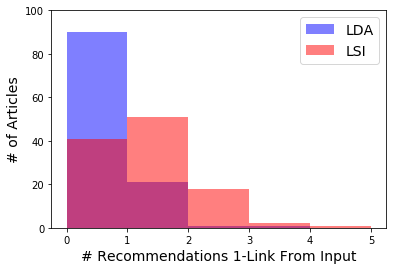

In [16]:
plt.hist(results_n_df['d1_lda_overlap'].dropna(), bins=[0,1,2,3,4,5], color='b', alpha=0.5, label='LDA');
plt.hist(results_n_df['d1_lsi_overlap'].dropna(), bins=[0,1,2,3,4,5], color='r', alpha=0.5, label='LSI');
plt.xlabel('# Recommendations 1-Link From Input', fontsize=14)
plt.ylabel('# of Articles', fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=14)
#plt.savefig('../figures/number_recs_1-link_from_title.png')

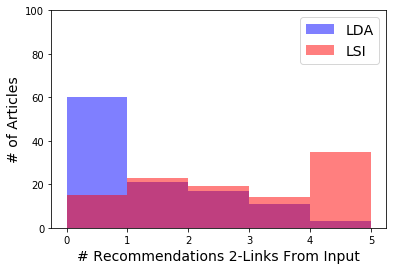

In [17]:
plt.hist(results_n_df['d2_lda_overlap'].dropna(), bins=[0,1,2,3,4,5], color='b', alpha=0.5, label='LDA');
plt.hist(results_n_df['d2_lsi_overlap'].dropna(), bins=[0,1,2,3,4,5], color='r', alpha=0.5, label='LSI');
plt.xlabel('# Recommendations 2-Links From Input', fontsize=14)
plt.ylabel('# of Articles', fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=14)
#plt.savefig('../figures/number_recs_2-links_from_title.png')

In [18]:
results_pct_df = pd.DataFrame(index=lsi_df.index, columns=['d1_lda_pct_overlap', 'd1_lsi_pct_overlap',\
                                                   'd2_lda_pct_overlap', 'd2_lsi_pct_overlap'])
for wiki_id in lda_df.index:
    results_dict = get_percent_overlap_of_results_and_links(wiki_id)
    for key in results_dict.keys():
        results_pct_df.loc[wiki_id, key] = results_dict[key]

results_pct_df.head()

,d1_lda_pct_overlap,d1_lsi_pct_overlap,d2_lda_pct_overlap,d2_lsi_pct_overlap
1467938,0,0.333333,0.2,0.2
275388,0,1,0,0.2
2352562,NaN,NaN,0.4,0.4
17021807,0,1,0,0.6
20777185,0,1,0,0.6


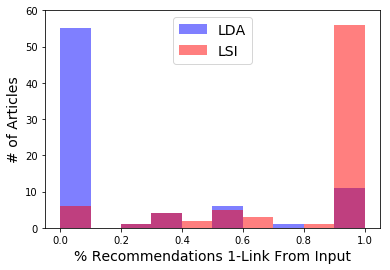

In [19]:
plt.hist(results_pct_df['d1_lda_pct_overlap'].dropna(), color='b', alpha=0.5, label='LDA');
plt.hist(results_pct_df['d1_lsi_pct_overlap'].dropna(), color='r', alpha=0.5, label='LSI');
plt.ylim(0,60)
plt.xlabel('% Recommendations 1-Link From Input', fontsize=14)
plt.ylabel('# of Articles', fontsize=14)
plt.legend(fontsize=14)
#plt.savefig('../figures/pct_recs_1-link_from_title.png')

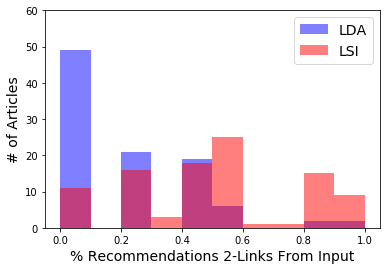

In [20]:
plt.hist(results_pct_df['d2_lda_pct_overlap'].dropna(), color='b', alpha=0.5, label='LDA');
plt.hist(results_pct_df['d2_lsi_pct_overlap'].dropna(), color='r', alpha=0.5, label='LSI');
plt.ylim(0,60)
plt.xlabel('% Recommendations 2-Links From Input', fontsize=14)
plt.ylabel('# of Articles', fontsize=14)
plt.legend(fontsize=14)
#plt.savefig('../figures/pct_recs_2-links_from_title.png')